In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#y, sr = librosa.load('dataset/beat_test_song.mp3', sr=44100, offset=72.5, duration=11.5) # default mono=True
y, sr = librosa.load('dataset/mirex_beat_tracking_2016/train/train1.wav', sr=44100, mono=True)
print("sample rate (Fs): %i" % (sr))
ipd.Audio(y, rate=sr)

sample rate (Fs): 44100


From experience,
- ```n_fft = 2048 samples@22050Hz, 4096 samples@44100Hz = 92.879818594104ms = frame duration```
- ```hop_length = n_fft * 3 // 4, that means overlap n_fft / 4 = 512 samples@22050Hz, 1024 samples@44100Hz = 23.219954648526 = overlap duration```

In [3]:
# frame duration between 20ms and 40ms
# if frame duration is 20ms, then 20*22050/1000 = 441 samples
# so, assign n_fft = 512, frame duration = 512/22050 = 1024/44010 = 23.22ms
n_fft = 4096 # 512 if sr==22050 else 1024 # the nubmer of samples per frame
#  hop samples, hop_length = n_fft means no overlap, high hop low overlap, default hop_length = n_fft//4
hop_length = n_fft * 3 // 4
print(hop_length)

3072


- The number of frames (n_of_frames)<br>
 ```if 0 < hop_length <= n_fft,
 (n_of_frames - 1) * hop_length + n_fft = sr * the total time in second
 n_of_frames * hop_length - hop_length + n_fft = sr * the total time in second```

 - Formula : **```n_of_frames = (sr * the total time in second + hop_length - n_fft) / hop_length```**

In [4]:
# Verify the number of frames
def verify_number_of_frames(n_of_frames, y, sr, n_fft, hop_length):
    __total_time = int(np.ceil(len(y) / sr))
    __n_of_frames = int(np.ceil((sr * __total_time + hop_length - n_fft) / hop_length))
    if __n_of_frames != n_of_frames:
        print("%d != %d" % (n_of_frames, __n_of_frames))
        raise ValueError
    else:
        print(n_of_frames)

(2049, 431)


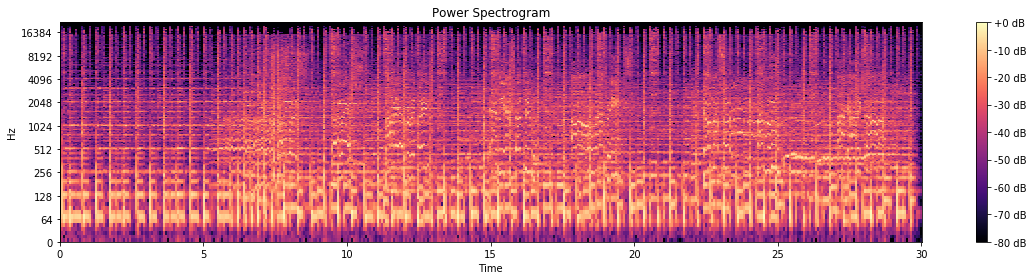

In [5]:
linear_ft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
print(linear_ft.shape)
plt.figure(figsize=[16,4])
#librosa.display.specshow(np.abs(linear_ft), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
# amplitude_to_db(S) = power_to_db(S**2)
librosa.display.specshow(librosa.amplitude_to_db(linear_ft, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

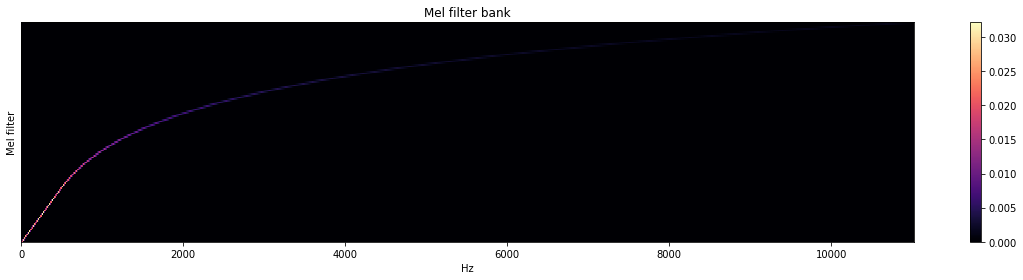

In [6]:
melfb = librosa.filters.mel(sr=sr, n_fft=n_fft) # mel-frequency filter bank
plt.figure(figsize=[16,4])
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()

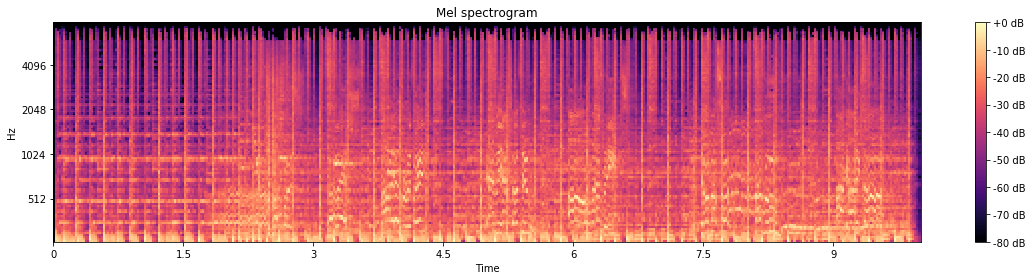

In [7]:
linear_ps = np.abs(linear_ft)**2 # Linear power spectram
mel_s = librosa.feature.melspectrogram(S=linear_ps)
plt.figure(figsize=[16, 4])
librosa.display.specshow(librosa.power_to_db(mel_s, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

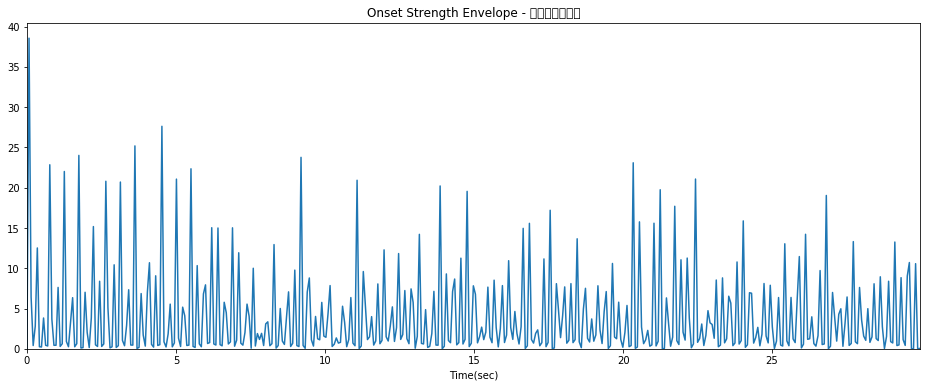

In [8]:
S = librosa.power_to_db(mel_s, ref=np.max)
onset_env = librosa.onset.onset_strength(S=S, hop_length=hop_length, n_fft=n_fft)
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
#print(t)

plt.figure(figsize=[16,6])
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time(sec)')
plt.title('Onset Strength Envelope - 愛情敢會當參詳');

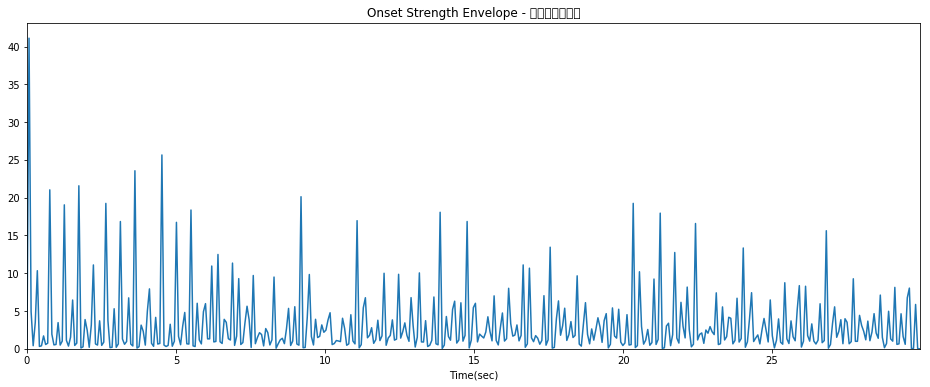

In [9]:
onset_env = librosa.onset.onset_strength(y, sr=sr, hop_length=hop_length, n_fft=n_fft)

frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=[16,6])
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time(sec)')
plt.title('Onset Strength Envelope - 愛情敢會當參詳');